## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

### Evaluation Rubrics

<table border="1" cellspacing="1" cellpadding="1"><tbody><tr><td><strong>Stage</strong></td><td><strong>Weightage</strong></td><td><strong>Meets Expectations</strong></td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-70363747-7fff-d91c-86fa-d41cc060992e">Data Reading/Data Understanding</b></td><td>5</td><td>The learner has imported the .json data and created the dataframe from it. The learner also has to read the data and make the initial analysis out of it.</td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-25724c20-7fff-dc72-470b-acc12841cb0b">Data Cleaning</b></td><td>10</td><td>The learner has to do the data cleaning operations like filtering text, removing missing values &amp; renaming column headers.</td></tr><tr><td><meta charset="utf-8"><meta charset="utf-8"><b id="docs-internal-guid-777daa65-7fff-549f-c970-6f0ff4f13c47">Data Preprocessing</b></td><td>10</td><td>Data pre-processing steps are done using statistical operations like Lemmatization &amp; POS tagging.</td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-e43ce6a8-7fff-447c-d4a6-1b548029986e">Data Visualisation</b></td><td>10</td><td>The learner has done the visualisation steps for finding the word count distribution &amp; n-gram distribution.</td></tr><tr><td><strong>Feature Extraction</strong></td><td>5</td><td>Features are extracted from the data using Td-Idf.</td></tr><tr><td><strong>Topic Modelling</strong></td><td>25</td><td><p>The learner has used Topic Modelling to do the following:</p><ul><li>Set the best number of clusters to 5.</li><li>Apply&nbsp;the best number to create word clusters.</li><li>Inspect&nbsp;&amp; validate&nbsp;the correction of each cluster for each&nbsp;complaint.</li><li>Map&nbsp;the clusters to topics/cluster names.</li></ul></td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-9f106ca2-7fff-8155-356c-09445982e37f">Model Building</b></td><td>20</td><td>&nbsp;Prepared the train &amp; test data using the labels received from NMF. The learner has to apply at least 2 of these models on the dataset created:<ul><li>Logistic regression</li><li>Decision Tree</li><li>Random Forest</li><li>Naive Bayes (optional)</li></ul><p>Once the models are built the learner has to evaluate their&nbsp;performance using relevant evaluation metrics to select the best model.</p></td></tr><tr><td><strong>Model Inference</strong></td><td>5</td><td>The learner has applied the best model to predict a&nbsp; custom text to see its performance.&nbsp;</td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-424d8c9c-7fff-f592-f73c-ca78ed7cfe77">Code readability and conciseness&nbsp;</b></td><td>10</td><td><p>The learner has done the following:</p><ul><li>Appropriate comments are written wherever applicable.</li><li>Overall, the code is readable&nbsp;and has&nbsp;appropriate indentations.</li></ul></td></tr></tbody></table>


## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
# Opening JSON file 
# Write the path to your data file and load it 
data_file_object = open("./data/complaints-2021-05-14_08_16.json")
  
# returns JSON object as  
# a dictionary 
data = json.load(data_file_object)
df=pd.json_normalize(data)

## Data preparation

In [3]:
# Inspect the dataframe to understand the given data.
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
# get shape of the dataframe
df.shape

(78313, 22)

In [5]:
# check column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [6]:
# get list of unique variables per column
df.nunique()

_index                                   1
_type                                    1
_id                                  78313
_score                                   1
_source.tags                             3
_source.zip_code                      9442
_source.complaint_id                 78313
_source.issue                          154
_source.date_received                 3444
_source.state                           62
_source.consumer_disputed                3
_source.product                         17
_source.company_response                 8
_source.company                          1
_source.submitted_via                    6
_source.date_sent_to_company          3309
_source.company_public_response          3
_source.sub_product                     72
_source.timely                           2
_source.complaint_what_happened      20931
_source.sub_issue                      205
_source.consumer_consent_provided        5
dtype: int64

In [7]:
# check for columns counts having null values
df.isnull().sum()[df.isnull().sum()>0]

_source.tags                         67413
_source.zip_code                      6757
_source.state                         1991
_source.company_public_response      78309
_source.sub_product                  10571
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [8]:
#print the column names
print(df.columns.to_list())

['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code', '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state', '_source.consumer_disputed', '_source.product', '_source.company_response', '_source.company', '_source.submitted_via', '_source.date_sent_to_company', '_source.company_public_response', '_source.sub_product', '_source.timely', '_source.complaint_what_happened', '_source.sub_issue', '_source.consumer_consent_provided']


In [9]:
#Assign new column names
df = df.rename(columns=lambda name: name.replace('_', '')) # remove underscores
df = df.rename(columns=lambda name: name.replace('source.', '')) # remove source dot
print(df.columns.to_list())

['index', 'type', 'id', 'score', 'tags', 'zipcode', 'complaintid', 'issue', 'datereceived', 'state', 'consumerdisputed', 'product', 'companyresponse', 'company', 'submittedvia', 'datesenttocompany', 'companypublicresponse', 'subproduct', 'timely', 'complaintwhathappened', 'subissue', 'consumerconsentprovided']


In [10]:
# convert source_datereceived column to a timestamp
df.datereceived = pd.to_datetime(df.datereceived)
df.datesenttocompany = pd.to_datetime(df.datesenttocompany)

In [11]:
# create derived columns/ create new features from timestamp
df['day_received'] = df['datereceived'].dt.day
df['weekday_received'] = df['datereceived'].dt.day_of_week
df['month_received'] =df['datereceived'].dt.month
df['year_received'] = df['datereceived'].dt.year
# df['hour_received'] = df['datereceived'].dt.hour
# df['minute_received'] = df['datereceived'].dt.minute

df['day_senttocompany'] = df['datesenttocompany'].dt.day
df['weekday_senttocompany'] = df['datesenttocompany'].dt.day_of_week
df['month_senttocompany'] =df['datesenttocompany'].dt.month
df['year_senttocompany'] = df['datesenttocompany'].dt.year
# df['hour_senttocompany'] = df['datereceived'].dt.hour
# df['minute_senttocompany'] = df['datesenttocompany'].dt.minute

# make an additional column called response latency
df['response_latency'] = (df['datesenttocompany'] - df['datereceived']).dt.days

In [12]:
#Assign nan in place of blanks in the complaints column
df['complaintwhathappened'] = df.complaintwhathappened.replace('',np.nan,regex = True)

In [13]:
#Remove all rows where complaints column is nan
df = df[df.complaintwhathappened.notnull()]

In [14]:
df.nunique()[df.nunique()==1]

index                      1
type                       1
score                      1
company                    1
submittedvia               1
companypublicresponse      1
consumerconsentprovided    1
dtype: int64

In [15]:
# drop columns not adding any information value
drop_column_list = df.nunique()[df.nunique()==1].index.tolist()
df=df.drop(columns=drop_column_list, axis = 1)
df.head(2)

,id,tags,zipcode,complaintid,issue,datereceived,state,consumerdisputed,product,companyresponse,...,subissue,day_received,weekday_received,month_received,year_received,day_senttocompany,weekday_senttocompany,month_senttocompany,year_senttocompany,response_latency
1,3229299,Servicemember,319XX,3229299,Written notification about debt,2019-05-01 12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,...,Didn't receive enough information to verify debt,1,2,5,2019,1,2,5,2019,0
2,3199379,None,77069,3199379,"Other features, terms, or problems",2019-04-02 12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,...,Problem with rewards from credit card,2,1,4,2019,2,1,4,2019,0


## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [16]:
# Write your function here to clean the text and remove all the unnecessary elements.

df.complaintwhathappened = df.complaintwhathappened.str.lower() # convert to lower
re_pattern = "\[.*?\]" # regex pattern to match square brackets
# remove text exclosed in square brackets
df['complaintwhathappened'] = df['complaintwhathappened'].str.replace(re_pattern, '', n=- 1, case=None, flags=0, regex=None)
# remove punctuation marks
df['complaintwhathappened'] = df['complaintwhathappened'].str.replace(r'[^\w\s]+', '')
# remove words containing numbers
re_pattern = "\w*\d\w*" # regex pattern to match square brackets
df['complaintwhathappened'] = df['complaintwhathappened'].str.replace(re_pattern, '', n=- 1, case=None, flags=0, regex=None)
# remove all instances of xxx.... in the sentence
df['complaintwhathappened'] = df['complaintwhathappened'].str.replace(r'\bx+\b', '')

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\1190707470.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\1190707470.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\1190707470.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\1190707470.py:13: FutureWarning:

The default value of regex will change from True to False in a future version.



In [17]:
df.complaintwhathappened

1        good morning my name is   and i appreciate it ...
2        i upgraded my   card in  and was told by the a...
10       chase card was reported on  however fraudulent...
11       on  while trying to book a     ticket i came a...
14       my grand son give me check for  i deposit it i...
                               ...                        
78303    after being a chase card customer for well ove...
78309    on wednesday  i called chas my   visa credit c...
78310    i am not familiar with  pay and did not unders...
78311    i have had flawless credit for  yrs ive had ch...
78312    roughly  years ago i closed out my accounts wi...
Name: complaintwhathappened, Length: 21072, dtype: object

In [18]:
#Write your function to Lemmatize the texts
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

wordnet_lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    lemmatized_list = (wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text))
    return " ".join(lemmatized_list)

In [19]:
df['complaintwhathappened_lemmatized'] = df['complaintwhathappened'].apply(lambda x: lemmatize_text(x))

In [20]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaintwhathappened', 'complaintwhathappened_lemmatized']]

In [21]:
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...
2,i upgraded my card in and was told by the a...,i upgraded my card in and wa told by the agent...
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...
11,on while trying to book a ticket i came a...,on while trying to book a ticket i came across...
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...
...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...
78309,on wednesday i called chas my visa credit c...,on wednesday i called chas my visa credit card...
78310,i am not familiar with pay and did not unders...,i am not familiar with pay and did not underst...
78311,i have had flawless credit for yrs ive had ch...,i have had flawless credit for yr ive had chas...


In [22]:
#Write your function to extract the POS tags 
nltk.download('averaged_perceptron_tagger')
def pos_tag(text):
    # write your code here
    output=[]
    tok_text = word_tokenize(text)
    tok_text_pos = nltk.pos_tag(tok_text)
    # iterarate through the list and keep only NN tags
    for tup in tok_text_pos:
        if tup[1] == 'NN':
            output.append(tup[0])
    return " ".join(output)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\droid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean['complaint_POS_removed'] = df_clean['complaintwhathappened_lemmatized'].apply(lambda x: pos_tag(x))

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\2258127967.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...,morning name stop bank cardmember service debt...
2,i upgraded my card in and was told by the a...,i upgraded my card in and wa told by the agent...,i card agent upgrade date agent wa information...
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...,card wa application identity consent service c...
11,on while trying to book a ticket i came a...,on while trying to book a ticket i came across...,book ticket i offer ticket card i information ...
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...
...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...
78309,on wednesday i called chas my visa credit c...,on wednesday i called chas my visa credit card...,wednesday i chas credit card provider claim pu...
78310,i am not familiar with pay and did not unders...,i am not familiar with pay and did not underst...,i pay risk consumer i bank app chase year mobi...
78311,i have had flawless credit for yrs ive had ch...,i have had flawless credit for yr ive had chas...,i credit credit card chase freedom problem bal...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




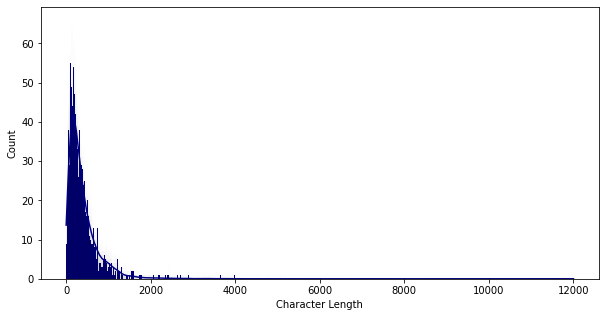

In [25]:
# Write your code here to visualise the data according to the 'Complaint' character length
ty_df = df_clean['complaint_POS_removed'].str.len()
# Plot histogram
plt.figure(1, figsize=(10,5))
sns.histplot(data = ty_df
            ,color = 'navy'
            ,alpha = 1
            ,binwidth = 1
            ,kde = True #kernel density estimate
            )

plt.xlabel("Character Length")

plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

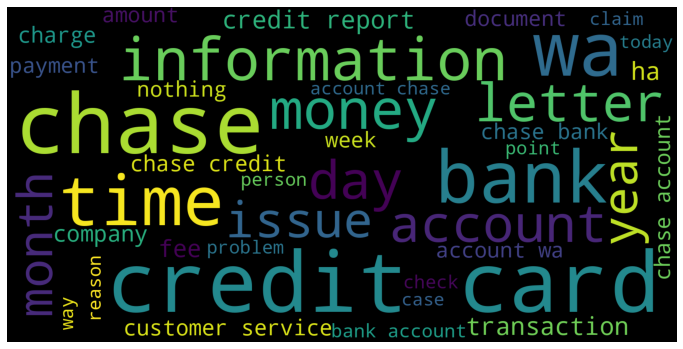

In [26]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
collated_text_list = df_clean['complaint_POS_removed'].tolist()
collated_text = " ".join(collated_text_list)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black",max_words=40).generate(collated_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [27]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\3655474111.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [70]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english',ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_clean['Complaint_clean'].values.astype('U'), 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the Complaint text after removing stop words and lemmatization"))
fig.show()


In [71]:
#Print the top 10 words in the unigram frequency
df2.head(10)

,unigram,count
0,chase,50864
1,account,47563
2,wa,33205
3,credit,33096
4,card,29544
5,bank,28239
6,payment,21169
7,time,16040
8,day,12980
9,charge,12232


In [55]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec=CountVectorizer(stop_words='english',ngram_range=(2, 2)).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True )
    return words_freq[:n]

common_words=get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'),30)
df3=pd.DataFrame(common_words,columns=['bigram', 'count'])

fig=go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 bigram in the Complaint text after removing stop words and lemmatization')) 
fig.show()

In [56]:
#Print the top 10 words in the bigram frequency
df3.head(10)

,bigram,count
0,credit card,12833
1,credit report,3878
2,chase credit,3155
3,customer service,3086
4,chase account,3081
5,account wa,2983
6,account chase,2966
7,bank account,2912
8,chase bank,2861
9,account account,2697


In [57]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec=CountVectorizer(stop_words='english',ngram_range=(3, 3)).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True )
    return words_freq[:n]

common_words=get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'),30)
df4=pd.DataFrame(common_words,columns=['bigram', 'count'])

fig=go.Figure([go.Bar(x=df4['bigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 trigram in the Complaint text after removing stop words and lemmatization')) 
fig.show()

In [58]:
#Print the top 10 words in the trigram frequency
df4.head(10)

,bigram,count
0,chase credit card,2141
1,credit card account,1085
2,credit card company,999
3,credit card chase,740
4,credit card credit,534
5,inquiry credit report,518
6,account credit card,428
7,bank credit card,410
8,card credit card,407
9,credit reporting agency,389


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [59]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

C:\Users\droid\AppData\Local\Temp\ipykernel_12676\619742717.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
#All masked texts has been removed
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...,morning name stop bank cardmember service debt...,morning name stop bank cardmember service debt...
2,i upgraded my card in and was told by the a...,i upgraded my card in and wa told by the agent...,i card agent upgrade date agent wa information...,i card agent upgrade date agent wa information...
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...,card wa application identity consent service c...,card wa application identity consent service c...
11,on while trying to book a ticket i came a...,on while trying to book a ticket i came across...,book ticket i offer ticket card i information ...,book ticket i offer ticket card i information ...
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,son deposit chase account fund chase bank acco...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...,chase card customer decade wa solicitation cre...
78309,on wednesday i called chas my visa credit c...,on wednesday i called chas my visa credit card...,wednesday i chas credit card provider claim pu...,wednesday i chas credit card provider claim pu...
78310,i am not familiar with pay and did not unders...,i am not familiar with pay and did not underst...,i pay risk consumer i bank app chase year mobi...,i pay risk consumer i bank app chase year mobi...
78311,i have had flawless credit for yrs ive had ch...,i have had flawless credit for yr ive had chas...,i credit credit card chase freedom problem bal...,i credit credit card chase freedom problem bal...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [72]:
#Write your code here to initialise the TfidfVectorizer 
vectorizer = TfidfVectorizer(analyzer='word', stop_words= 'english', max_df=0.95, min_df=2)

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [74]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
input_matrix = vectorizer.fit_transform(df_clean['Complaint_clean'].values)

In [77]:
pd.DataFrame(input_matrix.toarray(), columns=vectorizer.get_feature_names())

,__,___,____,aa,aarp,ab,abandonment,abatement,abbreviation,abd,...,youve,yr,ytd,zelle,zero,zeroed,zip,zipcode,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [76]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [78]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf = NMF(n_components=num_topics, random_state=40) #write your code here

In [84]:
W = nmf.fit_transform(tfidf_dtm)
H = nmf.components_       # Topic-term matrix
len(vectorizer.get_feature_names_out())

C:\Users\droid\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



6991

In [85]:
#Print the Top15 words for each of the topics
n_top = 15
words = np.array(vectorizer.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, n_top)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(n_top)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:n_top]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,fund,chase,wa,deposit,branch,day,checking,business,number,transaction,fee
Topic 2,charge,card,chase,transaction,dispute,wa,fraud,claim,merchant,purchase,fee,service,time,phone,statement
Topic 3,payment,balance,fee,month,statement,wa,day,time,date,chase,auto,credit,year,car,account
Topic 4,credit,card,report,inquiry,account,chase,score,company,bureau,limit,debt,application,information,year,balance
Topic 5,loan,mortgage,home,chase,modification,property,year,wa,rate,letter,time,document,bank,foreclosure,house


In [86]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_map = {
    'Topic 1' : 0,
    'Topic 2' : 1,
    'Topic 3' : 2,
    'Topic 4' : 3,
    'Topic 5' : 4
}


In [103]:
#Assign the best topic to each of the cmplaints in Topic Column
W = pd.DataFrame(W, columns=[f'Topic {i + 1}' for i in range(num_topics)])

# df_clean['Topic'] = W.apply(lambda x: topic_map.get(x.idxmax()), axis=1) #write your code to assign topics to each rows.
df_clean['Topic'] = W.apply(lambda x: topic_map.get(x.idxmax()) if x.idxmax() in topic_map.keys() else '4', axis=1)


In [104]:
df_clean.head()

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...,morning name stop bank cardmember service debt...,morning name stop bank cardmember service debt...,1.0
2,i upgraded my card in and was told by the a...,i upgraded my card in and wa told by the agent...,i card agent upgrade date agent wa information...,i card agent upgrade date agent wa information...,3.0
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...,card wa application identity consent service c...,card wa application identity consent service c...,0.0
11,on while trying to book a ticket i came a...,on while trying to book a ticket i came across...,book ticket i offer ticket card i information ...,book ticket i offer ticket card i information ...,3.0
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,son deposit chase account fund chase bank acco...,1.0


In [105]:
#Print the first 5 Complaint for each of the Topics
df_clean=df_clean.groupby('Topic').head(5)
df_clean.sort_values('Topic')

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...,card wa application identity consent service c...,card wa application identity consent service c...,0.0
15,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,0.0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0.0
58,i made a purchase of on i made payments of ...,i made a purchase of on i made payment of on a...,i purchase i payment payment closing date wa p...,i purchase i payment payment closing date wa p...,0.0
52,my roommate was stealing my chase debit card a...,my roommate wa stealing my chase debit card an...,roommate wa chase debit card driver license mo...,roommate wa chase debit card driver license mo...,0.0
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...,morning name stop bank cardmember service debt...,morning name stop bank cardmember service debt...,1.0
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,son deposit chase account fund chase bank acco...,1.0
20,during the summer months i experience a declin...,during the summer month i experience a decline...,summer month i income employment month payment...,summer month i income employment month payment...,1.0
26,i have reached out to several times in attemp...,i have reached out to several time in attempt ...,time attempt inquiry creditor inquiry report a...,time attempt inquiry creditor inquiry report a...,1.0
43,chase sent me an email today with the innocuou...,chase sent me an email today with the innocuou...,chase email today title information change cha...,chase email today title information change cha...,1.0


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [106]:
#Create the dictionary of Topic names and Topics

Topic_names = { 
                0 : "Bank account services",
                1 : "Credit Card/Prepaid Card",
                2 : "Mortgages/loans",
                3 : "Theft/Dispute reporting",
                4 : "Others"
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [107]:
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...,morning name stop bank cardmember service debt...,morning name stop bank cardmember service debt...,Credit Card/Prepaid Card
2,i upgraded my card in and was told by the a...,i upgraded my card in and wa told by the agent...,i card agent upgrade date agent wa information...,i card agent upgrade date agent wa information...,Theft/Dispute reporting
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...,card wa application identity consent service c...,card wa application identity consent service c...,Bank account services
11,on while trying to book a ticket i came a...,on while trying to book a ticket i came across...,book ticket i offer ticket card i information ...,book ticket i offer ticket card i information ...,Theft/Dispute reporting
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,son deposit chase account fund chase bank acco...,Credit Card/Prepaid Card
15,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,Bank account services
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,Bank account services
20,during the summer months i experience a declin...,during the summer month i experience a decline...,summer month i income employment month payment...,summer month i income employment month payment...,Credit Card/Prepaid Card
21,on i made a payment to an online retailer u...,on i made a payment to an online retailer usin...,payment retailer pay chase website i scam webs...,payment retailer pay chase website i scam webs...,Theft/Dispute reporting
23,i have a chase credit card which is incorrectl...,i have a chase credit card which is incorrectl...,chase credit card credit report company issue,chase credit card credit report company issue,Others


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [108]:
#Create the dictionary again of Topic names and Topics

Topic_names = { 
                "Bank account services":0
                ,"Credit Card/Prepaid Card":1
                ,"Mortgages/loans":2
                ,"Theft/Dispute reporting":3
                ,"Others":4
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [109]:
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning my name is and i appreciate it if...,morning name stop bank cardmember service debt...,morning name stop bank cardmember service debt...,1.0
2,i upgraded my card in and was told by the a...,i upgraded my card in and wa told by the agent...,i card agent upgrade date agent wa information...,i card agent upgrade date agent wa information...,3.0
10,chase card was reported on however fraudulent...,chase card wa reported on however fraudulent a...,card wa application identity consent service c...,card wa application identity consent service c...,0.0
11,on while trying to book a ticket i came a...,on while trying to book a ticket i came across...,book ticket i offer ticket card i information ...,book ticket i offer ticket card i information ...,3.0
14,my grand son give me check for i deposit it i...,my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,son deposit chase account fund chase bank acco...,1.0
15,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,0.0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0.0
20,during the summer months i experience a declin...,during the summer month i experience a decline...,summer month i income employment month payment...,summer month i income employment month payment...,1.0
21,on i made a payment to an online retailer u...,on i made a payment to an online retailer usin...,payment retailer pay chase website i scam webs...,payment retailer pay chase website i scam webs...,3.0
23,i have a chase credit card which is incorrectl...,i have a chase credit card which is incorrectl...,chase credit card credit report company issue,chase credit card credit report company issue,4.0


In [110]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data= df_clean[["complaintwhathappened","Topic"]]

In [111]:
training_data

,complaintwhathappened,Topic
1,good morning my name is and i appreciate it ...,1.0
2,i upgraded my card in and was told by the a...,3.0
10,chase card was reported on however fraudulent...,0.0
11,on while trying to book a ticket i came a...,3.0
14,my grand son give me check for i deposit it i...,1.0
15,can you please remove inquiry,0.0
17,with out notice jp morgan chase restricted my ...,0.0
20,during the summer months i experience a declin...,1.0
21,on i made a payment to an online retailer u...,3.0
23,i have a chase credit card which is incorrectl...,4.0


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [112]:
#Write your code to get the Vector count
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english', max_df=0.95, min_df=0.02)
input_matrix = vectorizer.fit_transform(training_data['complaintwhathappened'])

#Write your code here to transform the word vector to tf-idf

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics



